<a href="https://colab.research.google.com/github/suryanshgitmenongit/Deep-Learning-Based-Pyrolysis-Yield-Predictor/blob/main/Pyro_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/150
19/19 [==============================] - 2s 3ms/step - loss: 2533.5652
Epoch 2/150
19/19 [==============================] - 0s 3ms/step - loss: 2475.0891
Epoch 3/150
19/19 [==============================] - 0s 3ms/step - loss: 2426.3701
Epoch 4/150
19/19 [==============================] - 0s 3ms/step - loss: 2381.6531
Epoch 5/150
19/19 [==============================] - 0s 2ms/step - loss: 2326.6970
Epoch 6/150
19/19 [==============================] - 0s 2ms/step - loss: 2289.6365
Epoch 7/150
19/19 [==============================] - 0s 3ms/step - loss: 2248.7568
Epoch 8/150
19/19 [==============================] - 0s 5ms/step - loss: 2203.7786
Epoch 9/150
19/19 [==============================] - 0s 5ms/step - loss: 2155.3508
Epoch 10/150
19/19 [==============================] - 0s 5ms/step - loss: 2102.8906
Epoch 11/150
19/19 [==============================] - 0s 5ms/step - loss: 2064.5559
Epoch 12/150
19/19 [==============================] - 0s 4ms/step - loss: 2012.5750
E

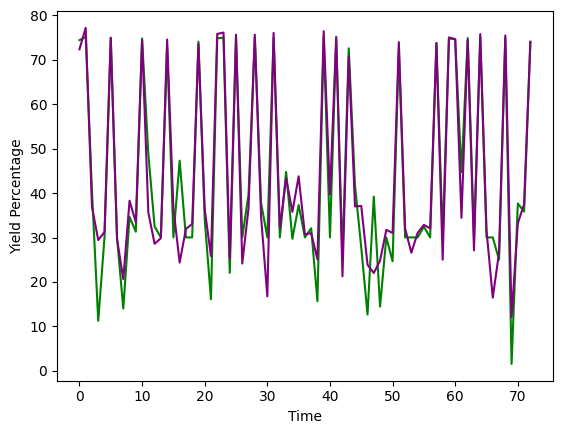

Epoch 1/200
19/19 [==============================] - 0s 15ms/step - loss: 71.2049 - val_loss: 41.0620
Epoch 2/200
19/19 [==============================] - 0s 5ms/step - loss: 74.0913 - val_loss: 40.8722
Epoch 3/200
19/19 [==============================] - 0s 5ms/step - loss: 71.7817 - val_loss: 41.3352
Epoch 4/200
19/19 [==============================] - 0s 6ms/step - loss: 73.7077 - val_loss: 41.4705
Epoch 5/200
19/19 [==============================] - 0s 5ms/step - loss: 79.9358 - val_loss: 40.9278
Epoch 6/200
19/19 [==============================] - 0s 5ms/step - loss: 85.7153 - val_loss: 40.7560
Epoch 7/200
19/19 [==============================] - 0s 5ms/step - loss: 95.3354 - val_loss: 40.6980
Epoch 8/200
19/19 [==============================] - 0s 5ms/step - loss: 70.1978 - val_loss: 40.5847
Epoch 9/200
19/19 [==============================] - 0s 6ms/step - loss: 67.8381 - val_loss: 40.8510
Epoch 10/200
19/19 [==============================] - 0s 6ms/step - loss: 62.3031 - val_lo

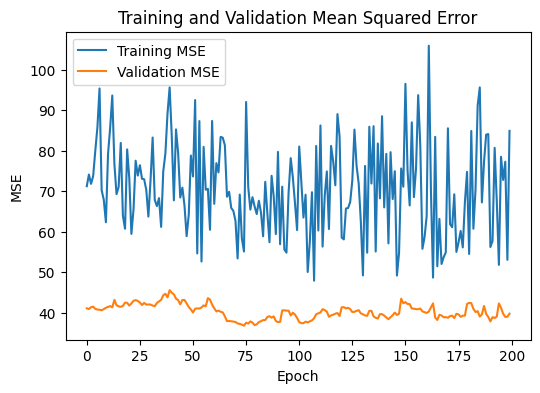

In [ ]:
!pip install tensorflow
import tensorflow as tf
from tensorflow import keras
import pickle as pkl
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
import tensorflow as tf
from tensorflow.keras import layers, models

def preprocess_data(df):
    ohe = OneHotEncoder(sparse=False)
    si = SimpleImputer(missing_values=np.nan, strategy='mean')

    for col in df.columns:
        if df[col].dtype == 'object':
            df[col] = ohe.fit_transform(df[[col]])
        elif df[col].isna().any():
            df[col] = si.fit_transform(df[[col]])

    return df

def build_ann(input_shape):
    inputs = tf.keras.Input(shape=input_shape)
    x = layers.BatchNormalization()(inputs)
    x = layers.Dense(units=20, activation="relu")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dense(units=20, activation="relu")(x)
    x = layers.BatchNormalization()(x)
    outputs = layers.Dense(units=1)(x)

    model = models.Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer="adam", loss="mean_squared_error")

    return model

def plot_mse(history):
    # Plotting Mean Squared Error
    import matplotlib.pyplot as plt
    plt.figure(figsize=(6, 4))
    plt.plot(history.history['loss'], label='Training MSE')
    plt.plot(history.history['val_loss'], label='Validation MSE')
    plt.title('Training and Validation Mean Squared Error')
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.legend()
    plt.show()

def main():
    dataset = pd.read_excel("Dataset.xlsx")

    X = dataset.iloc[:,:11].values
    y = dataset.iloc[:,11].values


    X = preprocess_data(pd.DataFrame(X))

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    model = build_ann(input_shape=(X_train.shape[1],))

    model.fit(X_train, y_train, batch_size=16, epochs=150)

    y_pred = model.predict(X_test)

    np.set_printoptions(precision=2)
    print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)), 1))

    import matplotlib.pyplot as plt
    plt.plot(y_test, color="green")
    plt.plot(y_pred, color="purple")
    plt.xlabel("Time")
    plt.ylabel("Yield Percentage")
    plt.show()

    global history
    history = model.fit(X_train, y_train, batch_size=16, epochs=200, validation_data=(X_test, y_test))

    plot_mse(history)

if __name__ == "__main__":
    main()

